In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
user_eng = pd.read_csv('takehome_user_engagement.csv')

In [152]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
user_eng['time_stamp'] = pd.to_datetime(user_eng['time_stamp'])
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [6]:
# number of unique users
user_eng['user_id'].unique().shape

(8823,)

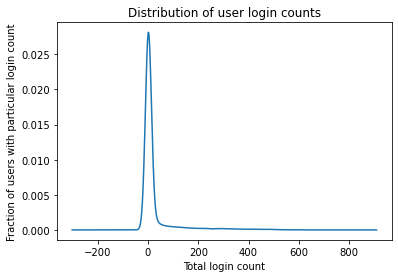

In [140]:
user_count = user_eng.groupby('user_id')['visited'].sum()
user_count.plot.kde()
plt.xlabel('Total login count')
plt.ylabel('Fraction of users with particular login count')
plt.title('Distribution of user login counts');

In [146]:
super_user = (user_count>50).astype(int)
super_user

user_id
1        0
2        0
3        0
4        0
5        0
        ..
11996    0
11997    0
11998    0
11999    0
12000    0
Name: visited, Length: 8823, dtype: int64

In [137]:
# need to find the difference between two consecutive logins
# let's test on a small sample
pd.set_option('chained_assignment',None)
small_sample = user_eng[user_eng['user_id']==2]
small_sample['next_time_stamp'] = small_sample['time_stamp'].shift(-1)
small_sample['time_stamp_delta'] = (small_sample['next_time_stamp']-small_sample['time_stamp']).dt.days
small_sample['year'] = small_sample['time_stamp'].dt.year
small_sample['month'] = small_sample['time_stamp'].dt.month
small_sample

,time_stamp,user_id,visited,next_time_stamp,time_stamp_delta,year,month
1,2013-11-15 03:45:04,2,1,2013-11-29 03:45:04,14.0,2013,11
2,2013-11-29 03:45:04,2,1,2013-12-09 03:45:04,10.0,2013,11
3,2013-12-09 03:45:04,2,1,2013-12-25 03:45:04,16.0,2013,12
4,2013-12-25 03:45:04,2,1,2013-12-31 03:45:04,6.0,2013,12
5,2013-12-31 03:45:04,2,1,2014-01-08 03:45:04,8.0,2013,12
6,2014-01-08 03:45:04,2,1,2014-02-03 03:45:04,26.0,2014,1
7,2014-02-03 03:45:04,2,1,2014-02-08 03:45:04,5.0,2014,2
8,2014-02-08 03:45:04,2,1,2014-02-09 03:45:04,1.0,2014,2
9,2014-02-09 03:45:04,2,1,2014-02-13 03:45:04,4.0,2014,2
10,2014-02-13 03:45:04,2,1,2014-02-16 03:45:04,3.0,2014,2


In [139]:
small_sample.groupby(['year','month'])['month'].count()

year  month
2013  11       2
      12       3
2014  1        1
      2        5
      3        3
Name: month, dtype: int64

In [9]:
def is_adopted_user(time_delta):
    time_delta = time_delta.values
    support=0
    for i in range(len(time_delta)-2):
        tally = time_delta[i]+time_delta[i+1]
        if tally<=7:
            support+=1
    return support
            

In [10]:
support = is_adopted_user(small_sample['time_stamp_delta'])
support

3

In [11]:
user_eng['next_time_stamp'] = user_eng.groupby('user_id')['time_stamp'].shift(-1)
user_eng['time_stamp_delta'] = (user_eng['next_time_stamp']-user_eng['time_stamp']).dt.days

user_eng_summary = user_eng.groupby('user_id')['time_stamp_delta'].apply(is_adopted_user)
user_eng_summary

user_id
1        0
2        3
3        0
4        0
5        0
        ..
11996    0
11997    0
11998    0
11999    0
12000    0
Name: time_stamp_delta, Length: 8823, dtype: int64

In [12]:
adopted_frequency = user_eng_summary.value_counts()
adopted_frequency.sort_index(inplace=True)
adopted_frequency

0      7167
1       179
2        82
3        50
4        54
       ... 
575       1
578       1
586       1
591       1
596       1
Name: time_stamp_delta, Length: 379, dtype: int64

Out of 8823 users 7167 are not adopted users, while 1656 are adopted users with varying frequency of weekly use.

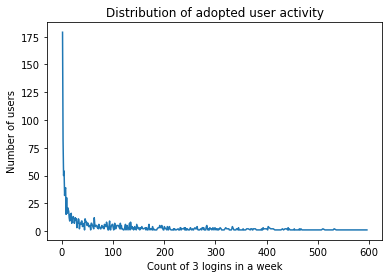

In [13]:
adopted_frequency[1:].plot()
plt.xlabel('Count of 3 logins in a week')
plt.ylabel('Number of users')
plt.title('Distribution of adopted user activity');

Text(0.5, 1.0, 'Cumulative distribution of adopted user login counts')

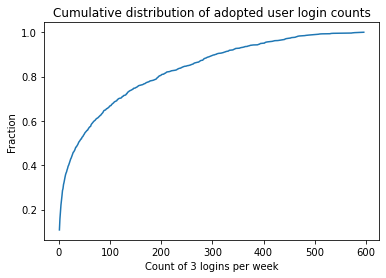

In [14]:
# the lines merge at the bottom, making it difficult to see, plot a cumulative distribution
cumulative_sum_fraction = adopted_frequency[1:].cumsum()/adopted_frequency[1:].sum()
cumulative_sum_fraction.plot()
plt.xlabel('Count of 3 logins per week')
plt.ylabel('Fraction')
plt.title('Cumulative distribution of adopted user login counts')

In [15]:
cumulative_sum_fraction[cumulative_sum_fraction<0.5]

1     0.108092
2     0.157609
3     0.187802
4     0.220411
5     0.239734
6     0.262077
7     0.285628
8     0.294686
9     0.312802
10    0.322464
11    0.335145
12    0.346618
13    0.357488
14    0.364734
15    0.370169
16    0.379227
17    0.385870
18    0.395531
19    0.399758
20    0.406401
21    0.413647
22    0.421498
23    0.428140
24    0.432367
25    0.438406
26    0.445652
27    0.451691
28    0.458333
29    0.460145
30    0.464372
31    0.468599
32    0.475242
33    0.481280
34    0.482488
35    0.486111
36    0.490338
37    0.493961
38    0.499396
Name: time_stamp_delta, dtype: float64

The cumulative distribution function increases rapidly initially then climbs slowly. There are different kinds of adopted users; 50% of users have up to 38 logins (3/week), the other 50% have up to 600 logins. Of course, it is posibble those users had more time to use the service, so it would be interesting to check when they signed up.

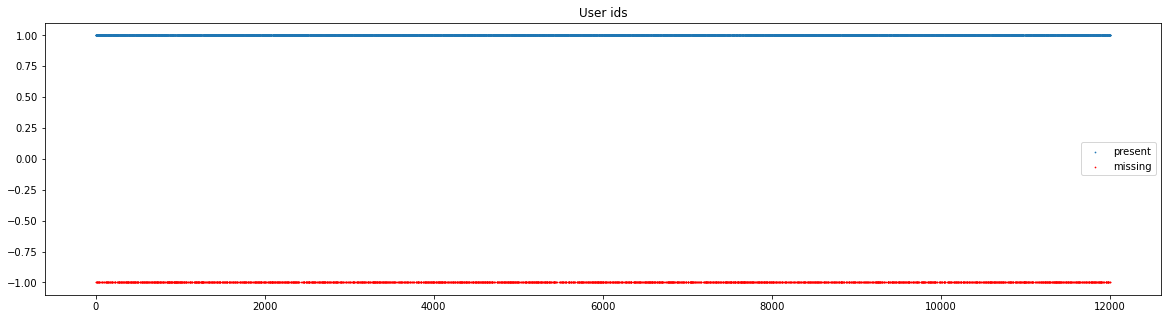

In [17]:
# We are supposed to have info for 12000 users, but instead we have 8823, let's see which user info is missing
all_users = list(range(1, 12001))
missing_users = [user for user in all_users if user not in user_eng_summary.index.tolist()]
plt.figure(figsize=(20,5))
plt.scatter(user_eng_summary.index, len(user_eng_summary)*[1], s=2, marker = '.', label = 'present')
plt.scatter(missing_users, len(missing_users)*[-1], s=2, marker = '.', color='r', label = 'missing')
plt.legend()
plt.title('User ids')
plt.show()

### Missing data interpretation
There does not appear to be a bias in the missing 3177 user_id numbers, they are evenly distributed in the range of 12000. Let's also create a binary column for adopted vs non_adopted users.

In [18]:
engaged = (user_eng_summary > 0).astype(int)
labeled_user_eng = pd.concat([user_eng_summary, engaged], axis=1)
labeled_user_eng.reset_index(inplace=True)
labeled_user_eng.columns = ['user_id','engagement_mag', 'engagement_bin']
labeled_user_eng.head()

,user_id,engagement_mag,engagement_bin
0,1,0,0
1,2,3,1
2,3,0,0
3,4,0,0
4,5,0,0


In [153]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [154]:
# last_session_creation time values 8823 match user_eng_table length
users  = users.merge(labeled_user_eng, how='outer', left_on='object_id', right_on='user_id')
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  user_id                     8823 non-null   float64
 11  engagement_mag              8823 non-null   float64
 12  engagement_bin              8823 non-null   float64
dtypes: float64(5), int64(4), object

In [156]:
users.set_index('object_id')
users  = users.merge(super_user, how='outer', left_index=True, right_index=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12001 entries, 0 to 12000
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  float64
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  float64
 7   enabled_for_marketing_drip  12000 non-null  float64
 8   org_id                      12000 non-null  float64
 9   invited_by_user_id          6417 non-null   float64
 10  user_id                     8823 non-null   float64
 11  engagement_mag              8823 non-null   float64
 12  engagement_bin              8823 non-null   float64
 13  visited                     882

In [157]:
users.visited.sum()

896.0

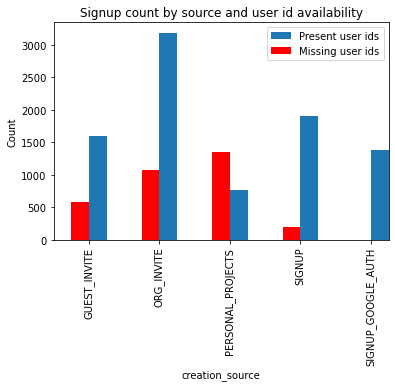

In [21]:
present_users = users[~users.user_id.isnull()].groupby('creation_source')['user_id'].count()
present_users.plot(kind='bar', label='Present user ids', position=0, width=0.25)

missing_users = users[users.user_id.isnull()].groupby('creation_source')['creation_source'].count()
missing_user_values = missing_users.tolist()
missing_user_values.append(0)
missing_user_index = missing_users.index.tolist()
missing_user_index.append('SIGNUP_GOOGLE_AUTH')
missing_users_appended = pd.Series(missing_user_values)
missing_users_appended.index = missing_user_index
missing_users_appended.plot(kind='bar', label='Missing user ids', color='red', position=1, width=0.25)

plt.legend()
plt.ylabel('Count')
plt.title('Signup count by source and user id availability')
plt.show()

The missing ids are present in 4 creation source categories out of 5. Almost twice as many user ids are missing for personal projects, hence the interpretation for this variable will have caveats as there is a bias in what users will be included in the analysis.

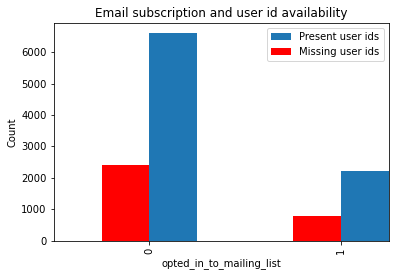

In [22]:
present_users = users[~users.user_id.isnull()].groupby('opted_in_to_mailing_list')['user_id'].count()
present_users.plot(kind='bar', label='Present user ids', position=0, width=0.25)

missing_users = users[users.user_id.isnull()].groupby('opted_in_to_mailing_list')['opted_in_to_mailing_list'].count()
missing_users.plot(kind='bar', label='Missing user ids', color='red', position=1, width=0.25)

plt.legend()
plt.ylabel('Count')
plt.title('Email subscription and user id availability')
plt.show()

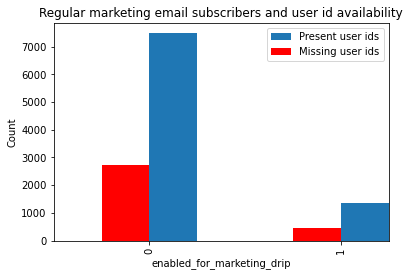

In [23]:
# similar proportion of user ids are missing from people who either subscribed or did not subscibe to the email
# so the user selection is not biased in terms of this variable
present_users = users[~users.user_id.isnull()].groupby('enabled_for_marketing_drip')['user_id'].count()
present_users.plot(kind='bar', label='Present user ids', position=0, width=0.25)

missing_users = users[users.user_id.isnull()].groupby('enabled_for_marketing_drip')['enabled_for_marketing_drip'].count()
missing_users.plot(kind='bar', label='Missing user ids', color='red', position=1, width=0.25)

plt.legend()
plt.ylabel('Count')
plt.title('Regular marketing email subscribers and user id availability')
plt.show()

In [24]:
# The user selection also seams unbiased in terms of this variable. How redundant are the email drip and opted email
# variables?
np.corrcoef(users.opted_in_to_mailing_list.values, users.enabled_for_marketing_drip.values)

array([[1.        , 0.48352909],
       [0.48352909, 1.        ]])

In [25]:
# some positive correlation but not a lot, worth keeping both
# lastly I would like to see unique Org ID numbers
users.org_id.unique().shape

(417,)

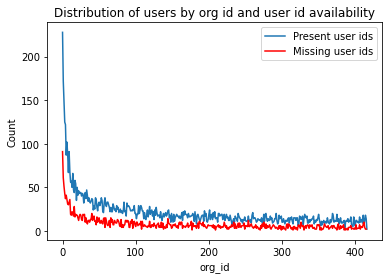

In [26]:
users[~users.user_id.isnull()].groupby('org_id')['object_id'].count().plot(label='Present user ids')
users[users.user_id.isnull()].groupby('org_id')['object_id'].count().plot(color='red', label='Missing user ids')
plt.ylabel('Count')
plt.title('Distribution of users by org id and user id availability')
plt.legend()

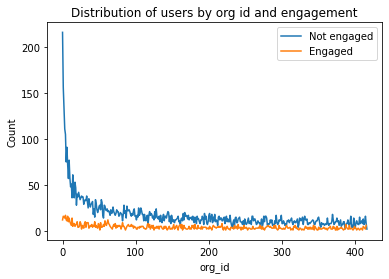

In [50]:
# simsilarly even distribution for present and missing user ids
# let's see the distribution for engaged and not engaged users
users[users.engagement_bin == 0].groupby('org_id')['object_id'].count().plot(label='Not engaged')
users[users.engagement_bin == 1].groupby('org_id')['object_id'].count().plot(label='Engaged')
plt.ylabel('Count')
plt.title('Distribution of users by org id and engagement')
plt.legend()

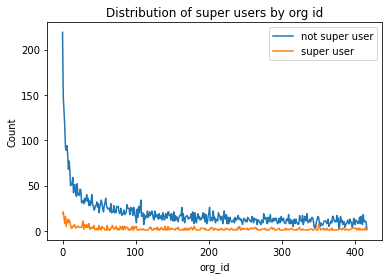

In [158]:
users[users.visited == 0].groupby('org_id')['object_id'].count().plot(label='not super user')
users[users.visited == 1].groupby('org_id')['object_id'].count().plot(label='super user')
plt.ylabel('Count')
plt.title('Distribution of super users by org id')
plt.legend()

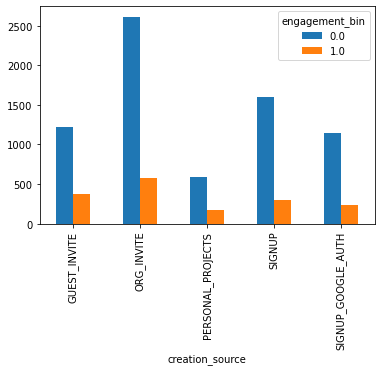

In [128]:
# org_id does not seem to make a difference
source_eng = users.groupby(['creation_source', 'engagement_bin'])['object_id'].count()
source_eng = source_eng.unstack(level=1)
source_eng.plot(kind='bar')

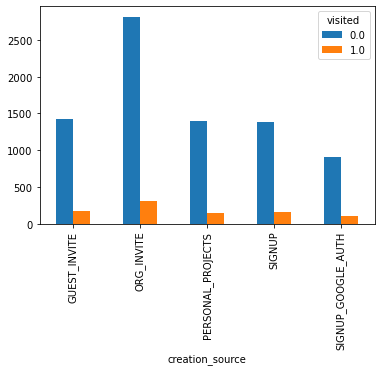

In [159]:
source_super = users.groupby(['creation_source', 'visited'])['object_id'].count()
source_super = source_super.unstack(level=1)
source_super.plot(kind='bar')

In [131]:
#source_eng.columns = [0, 1]
source_eng['total'] = source_eng[0] + source_eng[1]
source_eng['not adopted'] = source_eng[0]/source_eng['total']
source_eng['adopted'] = source_eng[1]/source_eng['total']
source_eng


engagement_bin,0.0,1.0,total,not adopted,adopted
creation_source,,,,,
GUEST_INVITE,1219,369,1588,0.767632,0.232368
ORG_INVITE,2614,574,3188,0.819950,0.180050
PERSONAL_PROJECTS,592,172,764,0.774869,0.225131
SIGNUP,1596,302,1898,0.840885,0.159115
SIGNUP_GOOGLE_AUTH,1146,239,1385,0.827437,0.172563


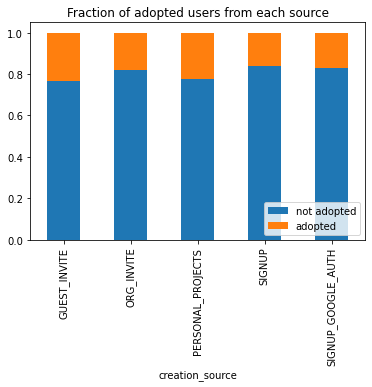

In [133]:
source_eng[['not adopted', 'adopted']].plot(kind='bar', stacked=True)
plt.legend(loc='lower right')
plt.title("Fraction of adopted users from each source");

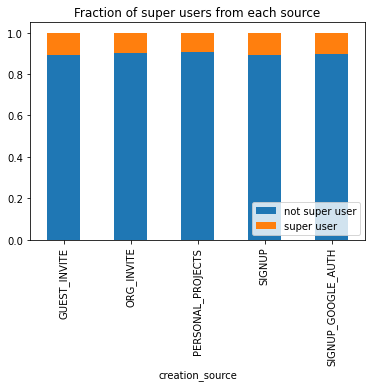

In [161]:
source_super['total'] = source_super[0] + source_super[1]
source_super['not super user'] = source_super[0]/source_super['total']
source_super['super user'] = source_super[1]/source_super['total']
source_super[['not super user', 'super user']].plot(kind='bar', stacked=True)
plt.legend(loc='lower right')
plt.title("Fraction of super users from each source");

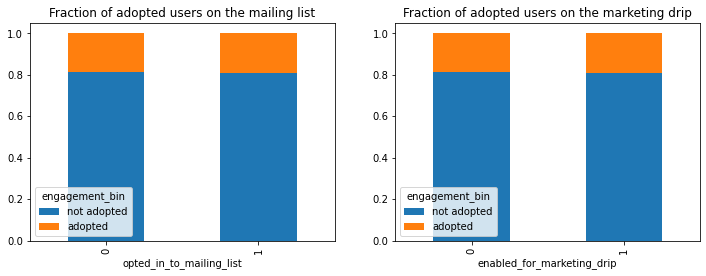

In [134]:
email_eng = users.groupby(['opted_in_to_mailing_list', 'engagement_bin'])['engagement_bin'].count()
email_eng = email_eng.unstack(level=1)
email_eng['total'] = email_eng[0.0] + email_eng[1.0]
email_eng['not adopted'] = email_eng[0.0]/email_eng['total']
email_eng['adopted'] = email_eng[1.0]/email_eng['total']

markd_eng = users.groupby(['enabled_for_marketing_drip', 'engagement_bin'])['engagement_bin'].count()
markd_eng = markd_eng.unstack(level=1)
markd_eng['total'] = markd_eng[0.0] + markd_eng[1.0]
markd_eng['not adopted'] = markd_eng[0.0]/markd_eng['total']
markd_eng['adopted'] = markd_eng[1.0]/markd_eng['total']

fig, ax = plt.subplots(1, 2, figsize=(12,4))
email_eng[['not adopted', 'adopted']].plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title("Fraction of adopted users on the mailing list")
markd_eng[['not adopted', 'adopted']].plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title("Fraction of adopted users on the marketing drip");

In [164]:
email_eng

engagement_bin,0.0,1.0,total,not adopted,adopted
opted_in_to_mailing_list,,,,,
0,5370,1227,6597,0.814006,0.185994
1,1797,429,2226,0.807278,0.192722


In [165]:
markd_eng

engagement_bin,0.0,1.0,total,not adopted,adopted
enabled_for_marketing_drip,,,,,
0,6083,1399,7482,0.813018,0.186982
1,1084,257,1341,0.808352,0.191648


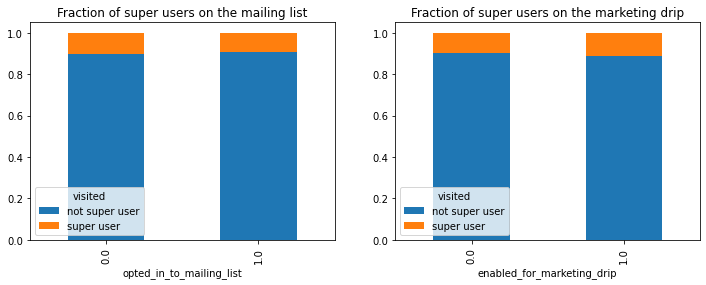

In [162]:
email_super = users.groupby(['opted_in_to_mailing_list', 'visited'])['visited'].count()
email_super = email_super.unstack(level=1)
email_super['total'] = email_super[0.0] + email_super[1.0]
email_super['not super user'] = email_super[0.0]/email_super['total']
email_super['super user'] = email_super[1.0]/email_super['total']

markd_super = users.groupby(['enabled_for_marketing_drip', 'visited'])['visited'].count()
markd_super = markd_super.unstack(level=1)
markd_super['total'] = markd_super[0.0] + markd_super[1.0]
markd_super['not super user'] = markd_super[0.0]/markd_super['total']
markd_super['super user'] = markd_super[1.0]/markd_super['total']

fig, ax = plt.subplots(1, 2, figsize=(12,4))
email_super[['not super user', 'super user']].plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title("Fraction of super users on the mailing list")
markd_super[['not super user', 'super user']].plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title("Fraction of super users on the marketing drip");

In [166]:
email_super

visited,0.0,1.0,total,not super user,super user
opted_in_to_mailing_list,,,,,
0.0,5940,692,6632,0.895657,0.104343
1.0,1986,204,2190,0.906849,0.093151


In [163]:
markd_super

visited,0.0,1.0,total,not super user,super user
enabled_for_marketing_drip,,,,,
0.0,6771,751,7522,0.900160,0.099840
1.0,1155,145,1300,0.888462,0.111538


In [44]:
# accounts generated via guest invite or personal project are more engaged
#users.creation_time = pd.to_datetime(users.creation_time)
#users.set_index('creation_time', inplace=True)
users['count'] = 1
account_creation_times = users['count']
account_creation_resampled = account_creation_times.resample('D').count()
account_creation_resampled

creation_time
2012-05-31    16
2012-06-01    13
2012-06-02    15
2012-06-03    19
2012-06-04     5
              ..
2014-05-26    39
2014-05-27    41
2014-05-28    45
2014-05-29    49
2014-05-30    71
Freq: D, Name: count, Length: 730, dtype: int64

Text(0.5, 1.0, 'Account creation frequency over time')

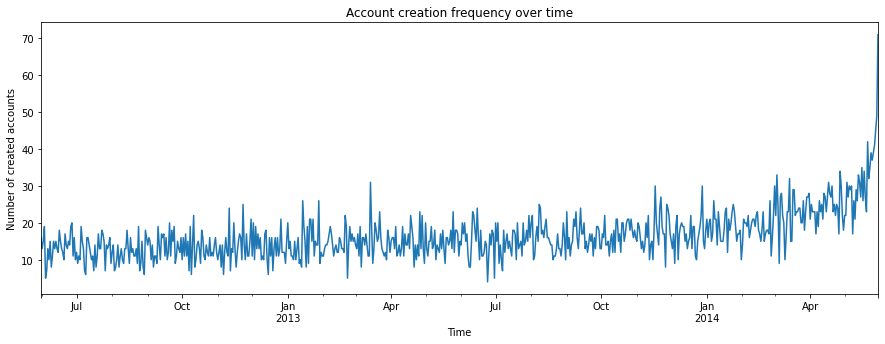

In [136]:
account_creation_resampled.plot(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Number of created accounts')
plt.title('Account creation frequency over time')

In [47]:
# account creation has essentially been flat untill April and then it has started to increase
eng_user_ac_creation = users[users.engagement_bin==1]['count']
eng_user_ac_creation

creation_time
2013-11-15 03:45:04    1
2013-01-16 22:08:03    1
2014-03-06 11:46:38    1
2014-03-11 06:29:09    1
2012-11-11 19:05:07    1
                      ..
2014-04-25 07:17:35    1
2014-01-12 08:12:37    1
2013-06-01 00:48:14    1
2013-03-23 11:10:11    1
2014-03-15 11:04:47    1
Name: count, Length: 1656, dtype: int64

Text(0.5, 1.0, 'Engaged user account creation frequency over time')

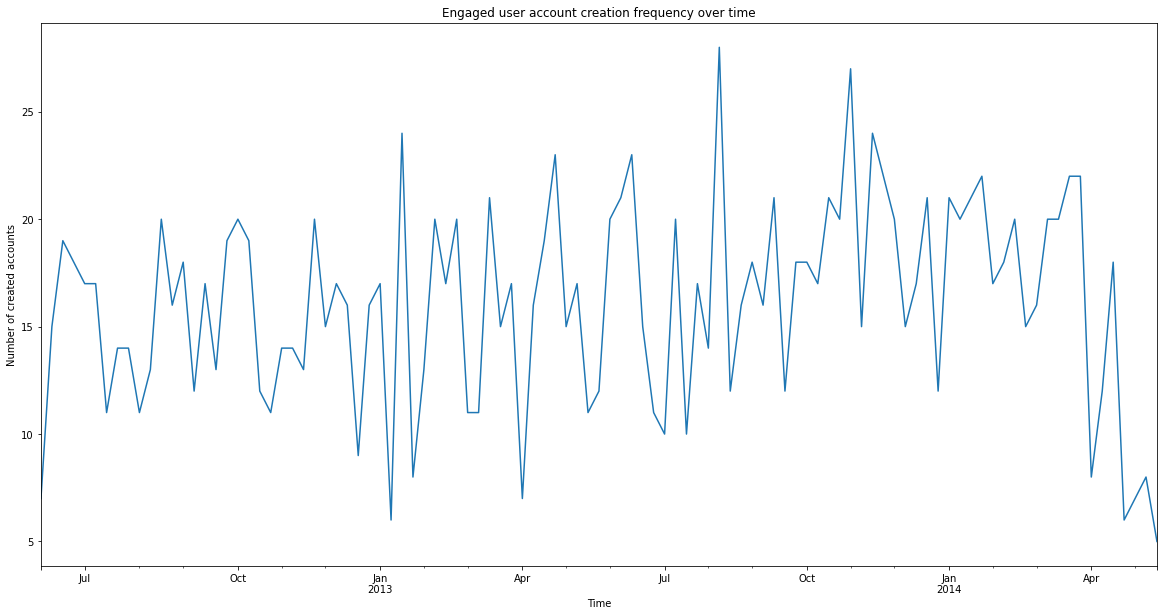

In [49]:
eng_user_ac_creation_resampled = eng_user_ac_creation.resample('W').count()
eng_user_ac_creation_resampled.plot(figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('Number of created accounts')
plt.title('Engaged user account creation frequency over time')

In [51]:
# it looks like with time there are more engaged user signups/ The drop in April is not significant, since the users 
# didn't have time to use the platform yet. Let's prep the data for modeling
users.reset_index(inplace=True)
useful_info = users[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'engagement_bin']]
print(len(useful_info))
useful_info.dropna(inplace=True)
print(len(useful_info))

12000
8823


In [54]:
# only one categorical variable that needs to be one hot encoded the creation sourse
useful_info = pd.get_dummies(useful_info, prefix_sep='_', columns=['creation_source'], drop_first=True)
useful_info.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'engagement_bin', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [89]:
# let's explore the data with decision trees
from sklearn.tree import DecisionTreeClassifier
X = useful_info.drop('engagement_bin', axis=1).values
y = useful_info['engagement_bin'].values

max_depth = 3
clf = DecisionTreeClassifier(max_depth=max_depth, class_weight='balanced')

clf.fit(X, y)

accuracy = clf.score(X, y)
print("Errors:", 100 - round(accuracy, 2) * 100, "%")
print("Accuracy:", round(accuracy, 2) * 100, "%")

Errors: 33.0 %
Accuracy: 67.0 %


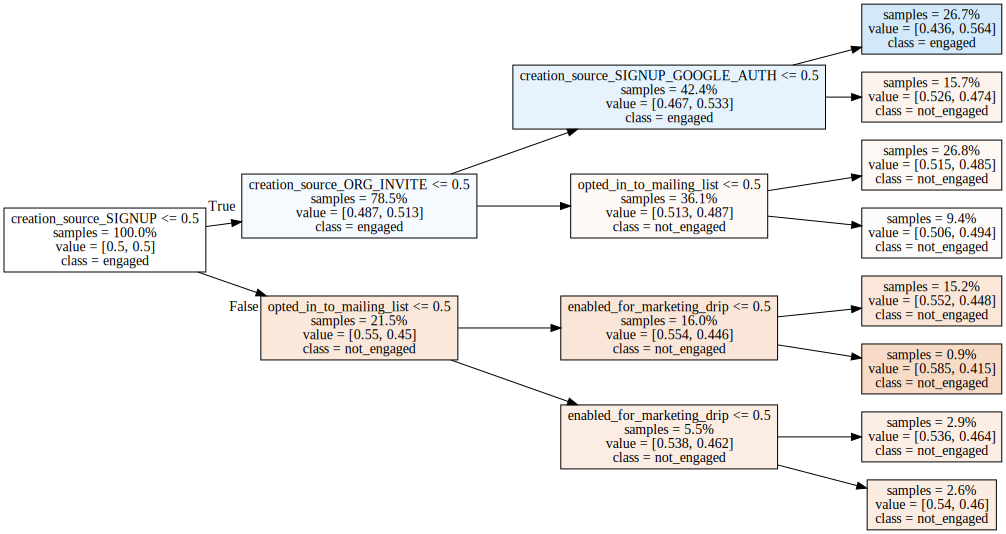

In [90]:
from sklearn import tree
from graphviz import Source
from IPython.display import display

feature_names = useful_info.drop('engagement_bin', axis=1).columns
class_names = ['not_engaged', 'engaged']

display(Source(tree.export_graphviz(clf, feature_names=feature_names, class_names=class_names, \
                                    filled=True, proportion=True, impurity=False, rotate=True)))

<BarContainer object of 6 artists>

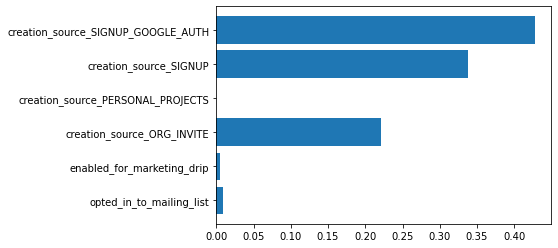

In [97]:
feat_imp = clf.feature_importances_
plt.barh(list(range(6)), feat_imp, tick_label=feature_names)
plt.title('Feature imprtance in the decision tree classifier')

In [98]:
# google signup and website sighnup seam important, the accuracy is pretty bad, let's try logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
random_state = 2020

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
# since the dataset is imbalanced f1 score is a good metric, gives information about both precision and recall
# perform cross-validation to select the regulaization parameter C
clf = LogisticRegressionCV(scoring='f1', solver='lbfgs', penalty='l2', class_weight='balanced', n_jobs=-1, random_state=random_state)

clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=2020, refit=True, scoring='f1',
                     solver='lbfgs', tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Dependence of F1 score on regularization strength')

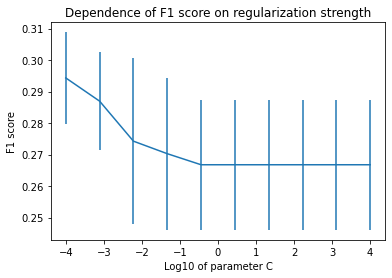

In [99]:
# plot f1 scores and regularization parameter C
plt.errorbar(x=np.log10(clf.Cs_), y=clf.scores_[1].mean(axis=0), yerr=clf.scores_[1].std(axis=0))
plt.ylabel('F1 score')
plt.xlabel('Log10 of parameter C')
plt.title('Dependence of F1 score on regularization strength')

In [100]:
# C=10^-4 appears optimal
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(C=10**(-4), solver='lbfgs', penalty='l2', class_weight='balanced', random_state=random_state)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.37      0.51      1790
         1.0       0.20      0.67      0.31       416

    accuracy                           0.43      2206
   macro avg       0.51      0.52      0.41      2206
weighted avg       0.71      0.43      0.47      2206

[[ 665 1125]
 [ 137  279]]


In [101]:
feature_weights = pd.DataFrame({'Feature' : feature_names, 'Weight': np.squeeze(lr.coef_)})
feature_weights.sort_values(by='Weight', ascending=False)

,Feature,Weight
3,creation_source_PERSONAL_PROJECTS,0.002091
0,opted_in_to_mailing_list,0.000621
1,enabled_for_marketing_drip,0.000415
2,creation_source_ORG_INVITE,-0.001800
5,creation_source_SIGNUP_GOOGLE_AUTH,-0.002981
4,creation_source_SIGNUP,-0.006280


In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.47      0.60      1790
         1.0       0.19      0.55      0.29       416

    accuracy                           0.48      2206
   macro avg       0.51      0.51      0.44      2206
weighted avg       0.70      0.48      0.54      2206

[[840 950]
 [188 228]]


Text(0.5, 1.0, 'Feature imprtance in the random forest classifier')

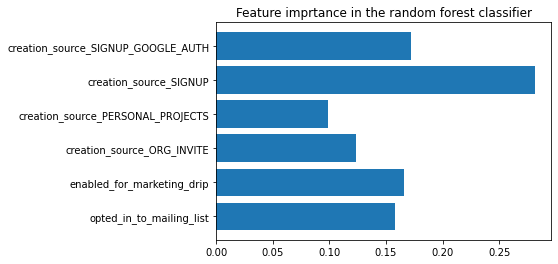

In [105]:
feat_imp = rf.feature_importances_
plt.barh(list(range(6)), feat_imp, tick_label=feature_names)
plt.title('Feature imprtance in the random forest classifier')

In [106]:
(12000-8823)/8823

0.36008160489629376

In [109]:
useful_info['engagement_bin'].sum()

1656.0

In [110]:
1656.0/(8823+1656.0)

0.15803034640709993

In [143]:
896/8823

0.1015527598322566